In [1]:
library("ggplot2")
library("readxl")
library("forecast")
library("tseries")
library("urca")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message:
"package 'urca' was built under R version 3.6.3"

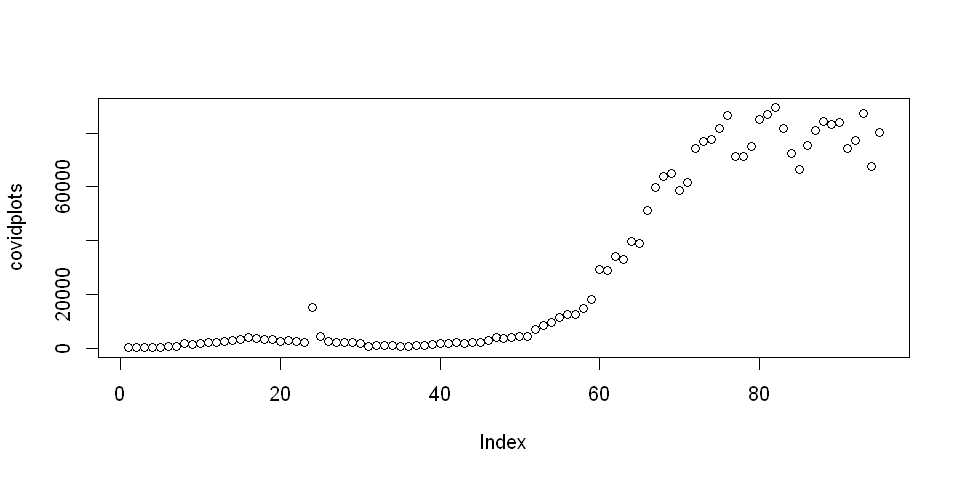

In [2]:
options(repr.plot.width=8, repr.plot.height=4)
covid<-data.frame(read_excel("C:/Users/avakk/Downloads/ccovid.xlsx"))

val<-paste(covid$year,"-",covid$month,"-",covid$day,sep = "")
covid$dateRep<-val
covid$dateRep<-as.Date(covid$dateRep)

total_cases_by_date<-aggregate(covid$cases,by=list(covid$dateRep),FUN=sum)
total_cases_by_date<-tail(total_cases_by_date,-21)
covidplots<-total_cases_by_date$x

plot(covidplots)

In [3]:
train<-head(covidplots,round(length(covidplots)*0.75))
d<-length(covidplots)-length(train)
test<-tail(covidplots,d)
length(test)
param<-auto.arima(train)
param

[1] 24

Series: train 
ARIMA(1,2,1) 

Coefficients:
          ar1      ma1
      -0.2015  -0.8780
s.e.   0.1251   0.0595

sigma^2 estimated as 10828510:  log likelihood=-656.63
AIC=1319.27   AICc=1319.63   BIC=1325.97

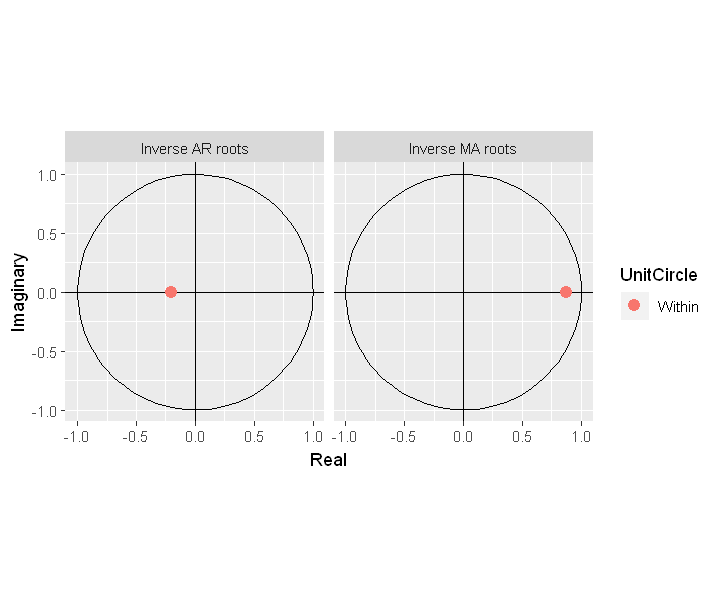

In [14]:
options(repr.plot.width=6, repr.plot.height=5)
plotfit<-arima(train,c(1,2,1))
autoplot(plotfit)


	Ljung-Box test

data:  Residuals from ARIMA(1,2,1)
Q* = 9.9462, df = 8, p-value = 0.2688

Model df: 2.   Total lags used: 10



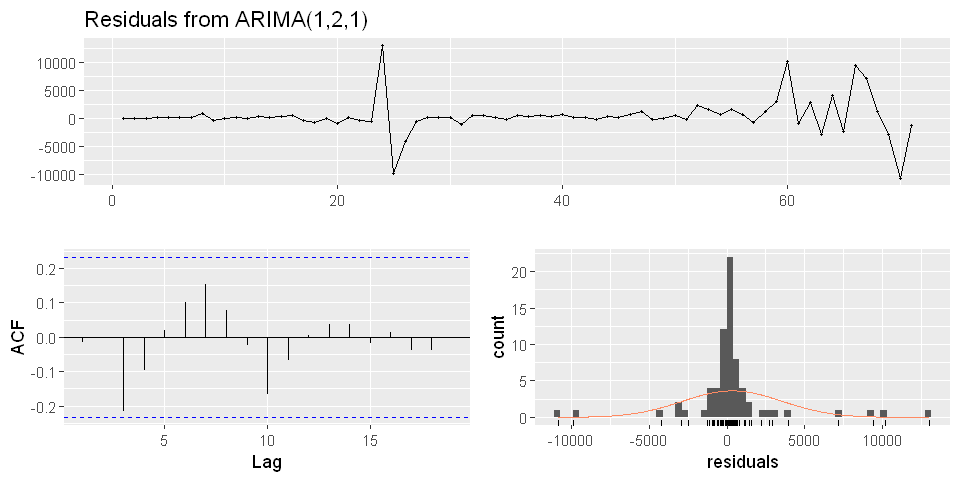

In [7]:
options(repr.plot.width=8, repr.plot.height=4)
checkresiduals(plotfit)

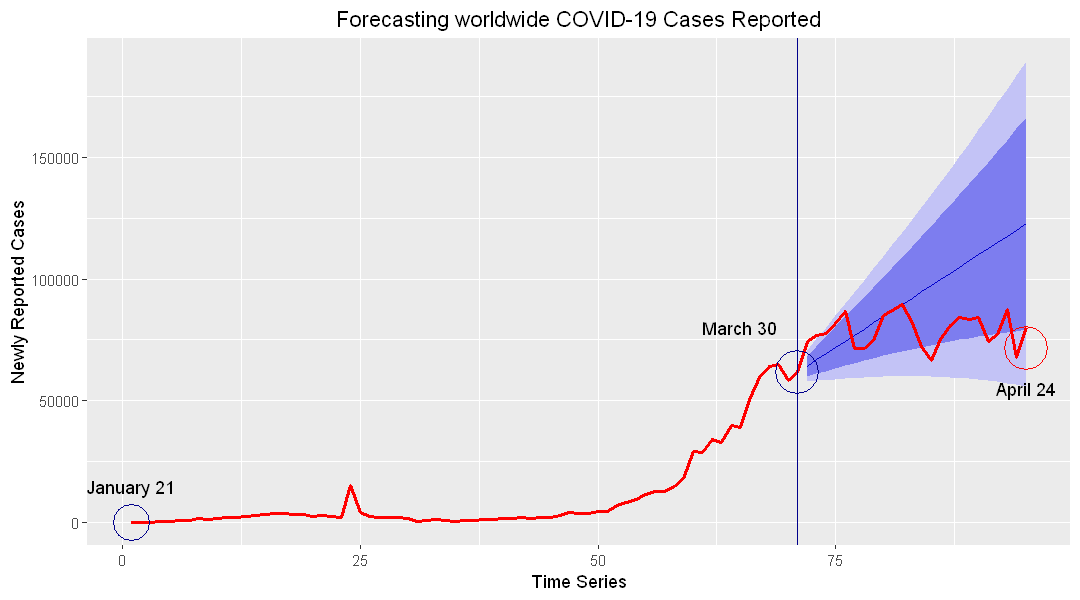

In [12]:
options(repr.plot.width=9, repr.plot.height=5)
p<-ts(total_cases_by_date$x)
autoplot(forecast(plotfit,h=24))+autolayer(p,size=1.1,color="red")+
  ggtitle("Forecasting worldwide COVID-19 Cases Reported")+labs(y="Newly Reported Cases", x = "Time Series")+
  theme(plot.title = element_text(hjust = 0.5))+geom_vline(xintercept = 71,color="darkblue")+
  annotate(geom="text",x=1,y=15000,label="January 21")+
  annotate(geom="point", x=1,y=153,size=10,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=65,y=80000,label="March 30")+
  annotate(geom="point", x=71,y=61808,size=12,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=95,y=55000,label="April 24")+
  annotate(geom="point", x=95,y=71392,size=12,shape=21,fill="transparent",color="red")

In [17]:
f<-forecast(plotfit)

forecastvalues<-data.frame(forecast(plotfit,h=24))
fvalues<-forecastvalues$Point.Forecast
fvalues<-ceiling(fvalues)

accuracy(fvalues,test)

,ME,RMSE,MAE,MPE,MAPE
Test set,-14644.58,23562.56,18890.75,-19.32991,24.66839


In [4]:
total_cases_by_date<-aggregate(covid$cases,by=list(covid$dateRep),FUN=sum)
total_cases_by_date<-tail(total_cases_by_date,-21)

covidplots<-total_cases_by_date$x

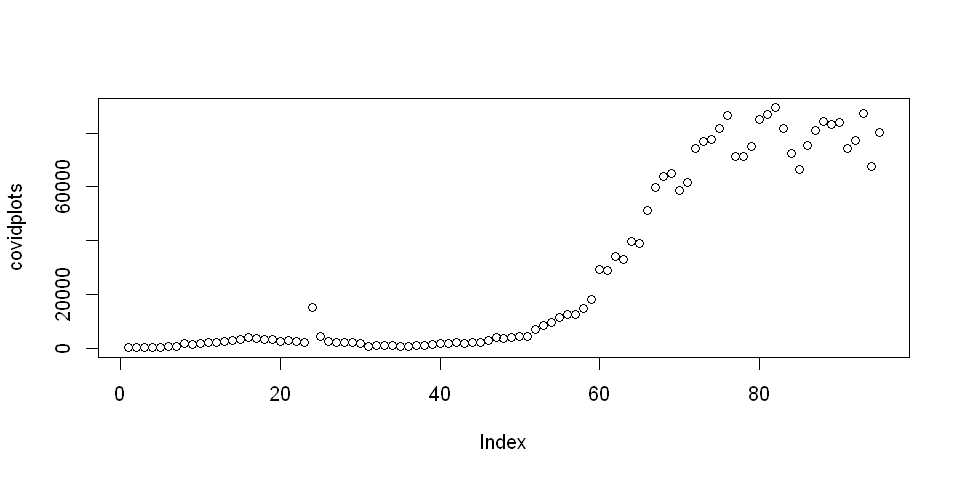

In [6]:
plot(covidplots)

In [5]:
train<-head(covidplots,round(length(covidplots)*0.75))
d<-length(covidplots)-length(train)
test<-tail(covidplots,d)

In [11]:
difference<-function(data,interval){
updata<-vector()
for(i in interval:length(data)-1){
    updata[i]<-(data[i+interval]-data[i])
}
return(updata)
} 

In [12]:
transformed <- difference(train, 1)

In [13]:
p<-ts(transformed)
fit<-tslm(p~trend)

In [53]:
fit


Call:
tslm(formula = p ~ trend)

Coefficients:
(Intercept)        trend  
    -886.47        49.78  



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals from Linear regression model
LM test = 15.11, df = 10, p-value = 0.1281


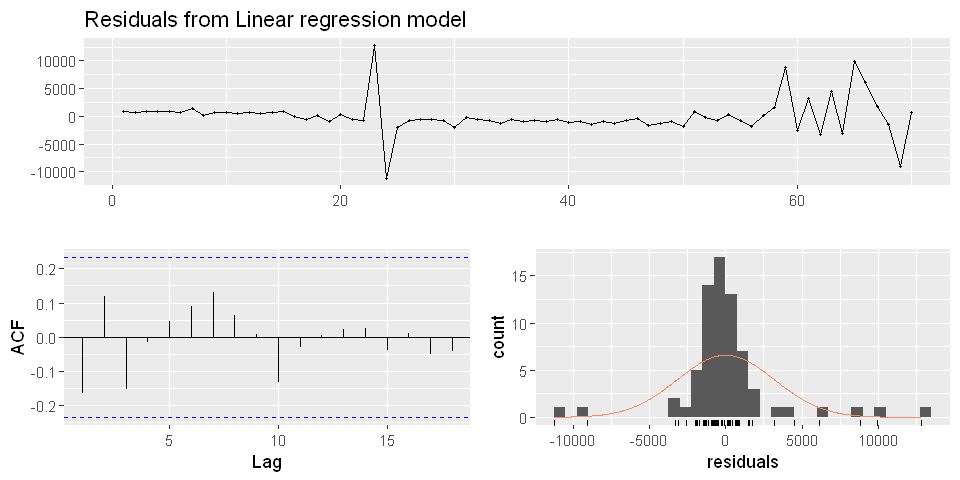

In [14]:
checkresiduals(fit)

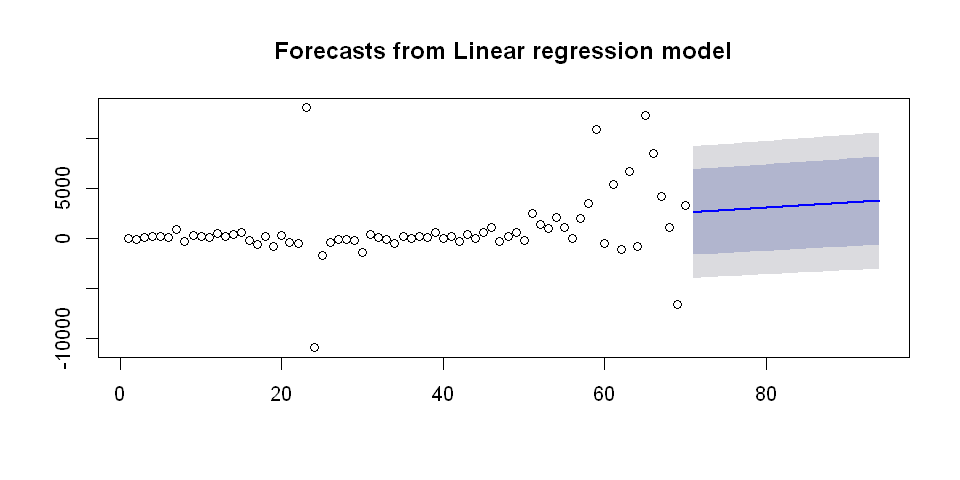

In [15]:
plot(forecast(fit,h=24),type="p")

In [16]:
forecastvalues<-data.frame(forecast(fit,h=24))

In [17]:
forecastvalues

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
71,2648.046,-1628.3052,6924.397,-3945.847,9241.939
72,2697.828,-1583.6101,6979.266,-3903.909,9299.565
73,2747.610,-1539.0500,7034.270,-3862.179,9357.398
74,2797.392,-1494.6244,7089.408,-3820.656,9415.440
75,2847.174,-1450.3328,7144.681,-3779.340,9473.688
76,2896.956,-1406.1748,7200.086,-3738.230,9532.141
77,2946.738,-1362.1497,7255.625,-3697.324,9590.800
78,2996.520,-1318.2570,7311.297,-3656.623,9649.663
79,3046.302,-1274.4963,7367.100,-3616.126,9708.729
80,3096.084,-1230.8669,7423.034,-3575.831,9767.998


In [27]:
fvalues<-forecastvalues$Point.Forecast
fvalues<-ceiling(fvalues)

lo95<-forecastvalues$Lo.95
lo95<-ceiling(lo95)

hi95<-forecastvalues$Hi.95
hi95<-ceiling(hi95)

In [28]:
invertdifference<-function(orig,diff,interval){
  upd<-vector()
  for(i in interval:length(orig)){
    upd[i]<-orig[i+interval]-diff[i]
  }
  upd[i]=upd[i-1]+diff[i-1]
  return(upd)
}

In [29]:
fvalues<-invertdifference(test,fvalues,1)
lo95<-invertdifference(test,lo95,1)
hi95<-invertdifference(test,hi95,1)

In [30]:
ytest<-append(train,test)
ypred<-append(train,fvalues)
ylow<-append(train,lo95)
yhigh<-append(train,hi95)

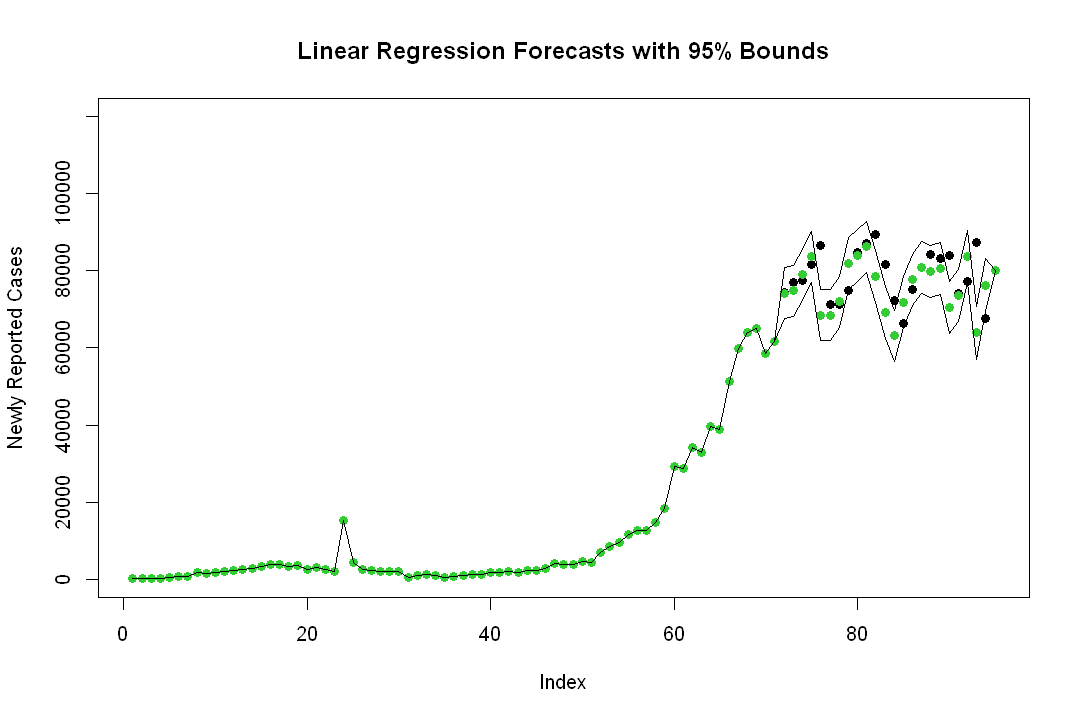

In [51]:
options(repr.plot.width=9, repr.plot.height=6)
plot(ytest,col="black",pch=19,ylim=c(0,120000),main="Linear Regression Forecasts with 95% Bounds",ylab="Newly Reported Cases")
points(ypred,col="limegreen",pch=19)
lines(ylow,col="black")
lines(yhigh,col="black")

In [41]:
accuracy(fvalues,test)

,ME,RMSE,MAE,MPE,MAPE
Test set,2826.417,8333.812,5667.917,3.113481,7.046726
